<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-to-know-the-data" data-toc-modified-id="Get-to-know-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get to know the data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Analysis-of-cuisines" data-toc-modified-id="Analysis-of-cuisines-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analysis of cuisines</a></span></li><li><span><a href="#Analysis-of-recipes" data-toc-modified-id="Analysis-of-recipes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis of recipes</a></span></li><li><span><a href="#Analysis-of-ingredients" data-toc-modified-id="Analysis-of-ingredients-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analysis of ingredients</a></span></li></ul></li><li><span><a href="#Similarity-of-cuisines" data-toc-modified-id="Similarity-of-cuisines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Similarity of cuisines</a></span></li><li><span><a href="#Market-basket-analysis" data-toc-modified-id="Market-basket-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Market basket analysis</a></span></li><li><span><a href="#Predict-cuisine-type" data-toc-modified-id="Predict-cuisine-type-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predict cuisine type</a></span></li></ul></div>

## Get to know the data

In [1]:
import pandas as pd

In [2]:
recipes = pd.read_csv('recipes.csv')
ingredients = pd.read_csv('ingredients.csv')

In [3]:
recipes.head()

,ID,cuisine
0,10259,greek
1,25693,southern_us
2,20130,filipino
3,22213,indian
4,13162,indian


In [4]:
ingredients.head()

,ID_recipe,ingredients
0,10259,romaine lettuce
1,10259,black olives
2,10259,grape tomatoes
3,10259,garlic
4,10259,pepper


In [5]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       39774 non-null  int64 
 1   cuisine  39774 non-null  object
dtypes: int64(1), object(1)
memory usage: 621.6+ KB


In [6]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428275 entries, 0 to 428274
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID_recipe    428275 non-null  int64 
 1   ingredients  428275 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [7]:
print('Missing values in recipes:\n{}\n\nMissing values in ingredients:\n{}'\
      .format(recipes.isnull().sum(), ingredients.isnull().sum()))

Missing values in recipes:
ID         0
cuisine    0
dtype: int64

Missing values in ingredients:
ID_recipe      0
ingredients    0
dtype: int64


## Exploratory Data Analysis

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

/opt/anaconda3/envs/CommaSoft/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/envs/CommaSoft/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
print('The unique IDs of "recipes" coincide with the unique recipe IDs of "ingredients": {}'.format(
    set(recipes.ID.unique()) == set(ingredients.ID_recipe.unique())))

The unique IDs of "recipes" coincide with the unique recipe IDs of "ingredients": True


In [10]:
# group ingredients by ID_recipe and put all ingredients in a list
ingredients = ingredients.groupby('ID_recipe').ingredients.apply(lambda x: x.tolist()).reset_index()
ingredients.head()

,ID_recipe,ingredients
0,0,"[mussels, ground black pepper, garlic cloves, ..."
1,1,"[tomatoes, diced red onions, paprika, salt, co..."
2,2,"[chicken broth, truffles, pimentos, green pepp..."
3,3,"[fresh ginger, sesame oil, frozen peas, cooked..."
4,4,"[orange peel, cookies, vanilla ice cream, gran..."


In [11]:
# merge recipes and ingredients and drop the ID_recipe column
df = recipes.merge(ingredients, left_on='ID', right_on='ID_recipe').drop(columns=['ID_recipe'], axis=1)
df['num_ingredients'] = df.ingredients.apply(len)
df.head()

,ID,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


### Analysis of cuisines

Number of different cuisines: 20


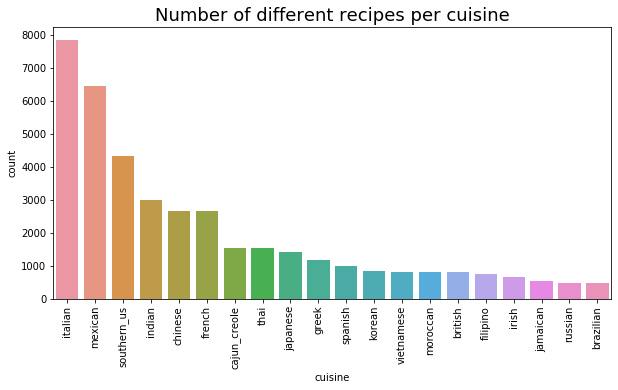

In [12]:
print(f'Number of different cuisines: {len(df.cuisine.unique())}')
plt.figure(figsize=(10,5)) 
sns.countplot(x="cuisine", data=df, order=df.cuisine.value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of different recipes per cuisine', fontsize=18)
plt.show()

Average number of ingredients among all cuisines: 10.91


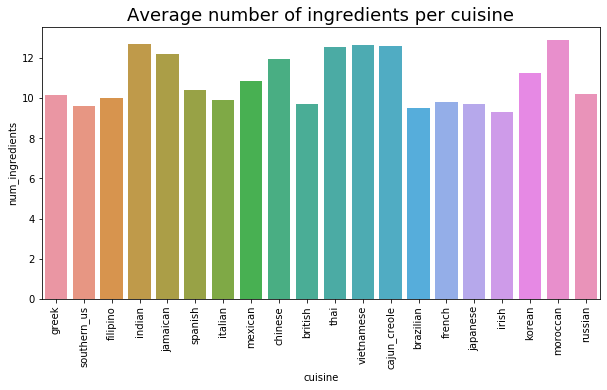

In [13]:
print(f'Average number of ingredients among all cuisines: {round(sum(df.loc[df.cuisine == cuisine].num_ingredients.mean() for cuisine in df.cuisine.unique())/len(df.cuisine.unique()),2)}')
plt.figure(figsize=(10,5)) 
sns.barplot(x="cuisine", y='num_ingredients', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('Average number of ingredients per cuisine', fontsize=18)
plt.show()

### Analysis of recipes

In [14]:
print(f'Number of different recipes: {len(df.ID.unique())}')

Number of different recipes: 39774


Fewest number of ingredients in a recipe: 1
Highest number of ingredients in a recipe: 65
Mean number of ingredients per recipe: 10.77


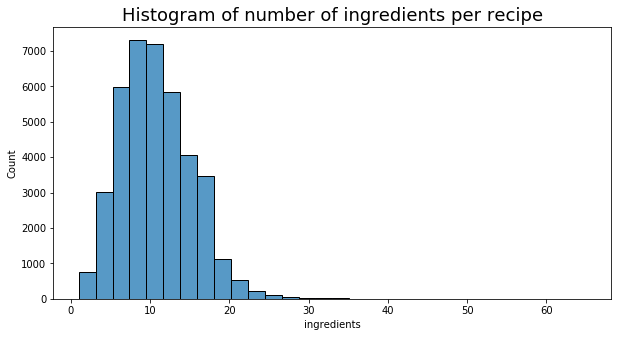

In [15]:
print(f'Fewest number of ingredients in a recipe: {min(df.ingredients.str.len())}')
print(f'Highest number of ingredients in a recipe: {max(df.ingredients.str.len())}')
print(f'Mean number of ingredients per recipe: {round(np.mean(df.ingredients.str.len()), 2)}')
plt.figure(figsize=(10,5)) 
sns.histplot(df.ingredients.str.len(), bins=30)
plt.title('Histogram of number of ingredients per recipe', fontsize=18)
plt.show()

### Analysis of ingredients

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
#from nltk.stem.porter import *

/opt/anaconda3/envs/CommaSoft/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/schaefer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def clean_text(text):
    #stemmer = PorterStemmer()
    pattern = '\d|%|!|\.|\(|\)|oz' # define patterns
    text = re.sub(pattern, " ", text).strip() # remove patterns and whitespaces at beginning and end
    text = text.lower().split(',') # lower case letters
    text = [word for word in text if word not in stop_words] # remove stop words
    #text = [PorterStemmer().stem(w) for w in text] # determine word stem
    return text

In [18]:
df['all_ingredients'] = df.ingredients.map(",".join).apply(clean_text)
df['ingredients'] = df.all_ingredients.map(",".join) 
df.head()

,ID,cuisine,ingredients,num_ingredients,all_ingredients
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga...",9,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground...",11,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c...",12,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"water,vegetable oil,wheat,salt",4,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper...",20,"[black pepper, shallots, cornflour, cayenne pe..."


In [19]:
# list of all unique ingredients
unique_ingredients = list()

for row in range(df.shape[0]):
    unique_ingredients.append(df.all_ingredients.loc[row])
    
unique_ingredients = set([item for sublist in unique_ingredients for item in sublist])
print(f'Number of unique ingredients: {len(unique_ingredients)}')

Number of unique ingredients: 6713


<span class="girk">What percentage of all recipes contain each ingredient?</span>

In [20]:
# number of times ingredient occurs in recipes
recipe_freq = dict()

for ingredient in unique_ingredients:
    recipe_freq[ingredient] = df.ingredients.str.contains(ingredient).sum()

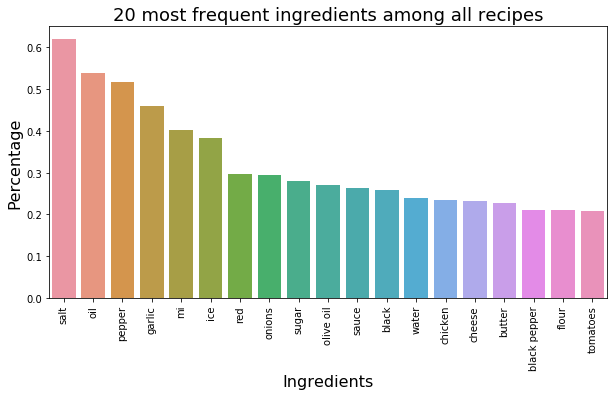

In [42]:
num = 20
most_frequent = {ingredient: frequency/df.shape[0] for ingredient, frequency in 
                 sorted(recipe_freq.items(), key=lambda x: x[1], reverse=True)[1:num]}
plt.figure(figsize=(10,5)) 
sns.barplot(x=list(most_frequent.keys()), y=list(most_frequent.values()))
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title(f'{num} most frequent ingredients among all recipes', fontsize=18)
plt.show()

<span class="girk">What percentage of all cuisines contain each ingredient?</span>

In [22]:
# number of times ingredient occurs in cuisines
cuisine_freq = dict()

for ingredient in unique_ingredients:
    cuisine_freq[ingredient] = df.groupby('cuisine').ingredients.apply(list).map(",".join).str\
    .contains(ingredient).sum()

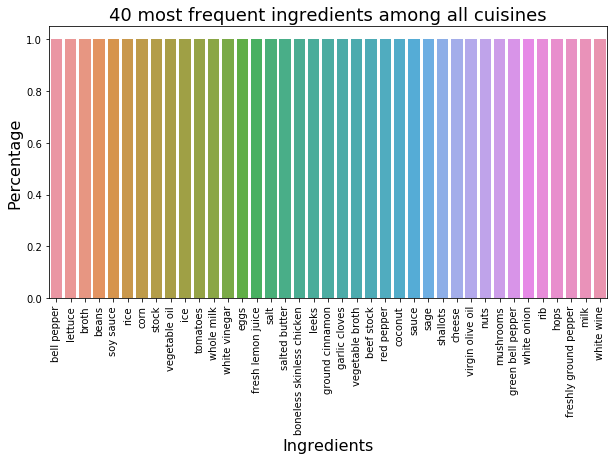

In [44]:
num = 40
most_frequent = {ingredient: frequency/20 for ingredient, frequency in 
                 sorted(cuisine_freq.items(), key=lambda x: x[1], reverse=True)[1:num]}
plt.figure(figsize=(10,5)) 
sns.barplot(x=list(most_frequent.keys()), y=list(most_frequent.values()))
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title(f'{num} most frequent ingredients among all cuisines', fontsize=18)
plt.show()

In [24]:
print('Number of ingredients found in all cuisines: {}\n'.format(round(
    (len([key for key, val in cuisine_freq.items() if int(val) == 1])))))
print('Proportion of ingredients found in all cuisines: {}%'.format(round(
    (len([key for key, val in cuisine_freq.items() if int(val) == 1])/len(cuisine_freq.keys()))*100, 1)))

Number of ingredients found in all cuisines: 2397

Proportion of ingredients found in all cuisines: 35.7%


## Similarity of cuisines

In [25]:
# group recipes by cuisine
cuisine_ingredients = df.groupby('cuisine').ingredients.apply(list).reset_index()
cuisine_ingredients['all_ingredients'] = cuisine_ingredients.ingredients.map(','.join)
cuisine_ingredients.head()

,cuisine,ingredients,all_ingredients
0,brazilian,"[ice cubes,club soda,white rum,lime,turbinado,...","ice cubes,club soda,white rum,lime,turbinado,e..."
1,british,"[greek yogurt,lemon curd,confectioners sugar,r...","greek yogurt,lemon curd,confectioners sugar,ra..."
2,cajun_creole,"[herbs,lemon juice,fresh tomatoes,paprika,mang...","herbs,lemon juice,fresh tomatoes,paprika,mango..."
3,chinese,"[low sodium soy sauce,fresh ginger,dry mustard...","low sodium soy sauce,fresh ginger,dry mustard,..."
4,filipino,"[eggs,pepper,salt,mayonaise,cooking oil,green ...","eggs,pepper,salt,mayonaise,cooking oil,green c..."


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Init tf-idf vectorizer
tfidf = TfidfVectorizer() 

# Generate tf-idf vectors for ingredients
tfidf_vectors = tfidf.fit_transform(cuisine_ingredients.all_ingredients).todense()

# Word frequencies
tfidf_vectors = pd.DataFrame(tfidf_vectors, 
                  columns=tfidf.get_feature_names(), 
                  index=cuisine_ingredients.cuisine.values)

# similarity between cuisines
result = pd.DataFrame(cosine_similarity(tfidf_vectors, tfidf_vectors), 
                      index=cuisine_ingredients.cuisine.values, columns=cuisine_ingredients.cuisine.values)
result

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,1.000000,0.660723,0.742208,0.580771,0.769143,0.756450,0.695702,0.687449,0.665829,0.740613,0.777959,0.555736,0.571105,0.743918,0.668688,0.705973,0.743262,0.807741,0.685298,0.653479
british,0.660723,1.000000,0.591199,0.467724,0.631367,0.859543,0.562846,0.560637,0.926538,0.632782,0.661726,0.508460,0.446891,0.560803,0.542985,0.909234,0.911193,0.604215,0.445417,0.478662
cajun_creole,0.742208,0.591199,1.000000,0.605637,0.746191,0.708895,0.688443,0.619021,0.635261,0.738197,0.780895,0.532476,0.578620,0.724902,0.649824,0.657845,0.747512,0.803655,0.590124,0.605217
chinese,0.580771,0.467724,0.605637,1.000000,0.839828,0.540539,0.496180,0.553624,0.460857,0.555595,0.635959,0.835613,0.866779,0.561928,0.505658,0.521907,0.558604,0.603604,0.755819,0.816979
filipino,0.769143,0.631367,0.746191,0.839828,1.000000,0.683016,0.607519,0.656021,0.641097,0.670711,0.792706,0.748613,0.782562,0.678382,0.614969,0.697043,0.720434,0.727474,0.741511,0.806793
french,0.756450,0.859543,0.708895,0.540539,0.683016,1.000000,0.759999,0.625020,0.837440,0.835334,0.723178,0.540413,0.502139,0.666978,0.685323,0.881168,0.862115,0.817612,0.548384,0.570880
greek,0.695702,0.562846,0.688443,0.496180,0.607519,0.759999,1.000000,0.640400,0.583787,0.859303,0.681271,0.469590,0.479800,0.696728,0.769374,0.649582,0.641331,0.837487,0.519030,0.538668
indian,0.687449,0.560637,0.619021,0.553624,0.656021,0.625020,0.640400,1.000000,0.577501,0.616373,0.734848,0.568130,0.538754,0.708774,0.795156,0.607489,0.617449,0.679008,0.627436,0.605086
irish,0.665829,0.926538,0.635261,0.460857,0.641097,0.837440,0.583787,0.577501,1.000000,0.650003,0.680881,0.494905,0.458745,0.591891,0.563270,0.892426,0.902884,0.631058,0.449962,0.481688
italian,0.740613,0.632782,0.738197,0.555595,0.670711,0.835334,0.859303,0.616373,0.650003,1.000000,0.695721,0.510427,0.522494,0.734081,0.709756,0.697632,0.719059,0.858226,0.555094,0.571047


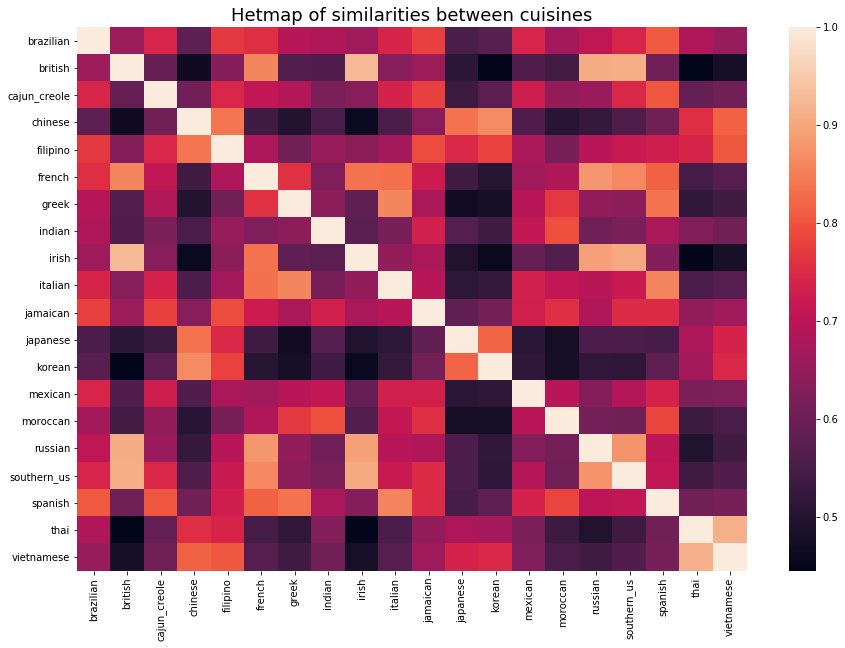

In [48]:
plt.figure(figsize=(15,10)) 
sns.heatmap(result)
plt.title('Hetmap of similarities between cuisines', fontsize=18)
plt.show()

In [28]:
for cuisine in result.index:
    print(f'The {cuisine} cuisine is most similar to the {result[cuisine].nlargest(2).reset_index().loc[1].values[0]} cuisine: {round(result[cuisine].nlargest(2).reset_index().loc[1].values[1],2)}')

The brazilian cuisine is most similar to the spanish cuisine: 0.81
The british cuisine is most similar to the irish cuisine: 0.93
The cajun_creole cuisine is most similar to the spanish cuisine: 0.8
The chinese cuisine is most similar to the korean cuisine: 0.87
The filipino cuisine is most similar to the chinese cuisine: 0.84
The french cuisine is most similar to the russian cuisine: 0.88
The greek cuisine is most similar to the italian cuisine: 0.86
The indian cuisine is most similar to the moroccan cuisine: 0.8
The irish cuisine is most similar to the british cuisine: 0.93
The italian cuisine is most similar to the greek cuisine: 0.86
The jamaican cuisine is most similar to the filipino cuisine: 0.79
The japanese cuisine is most similar to the chinese cuisine: 0.84
The korean cuisine is most similar to the chinese cuisine: 0.87
The mexican cuisine is most similar to the brazilian cuisine: 0.74
The moroccan cuisine is most similar to the indian cuisine: 0.8
The russian cuisine is mos

## Market basket analysis

In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

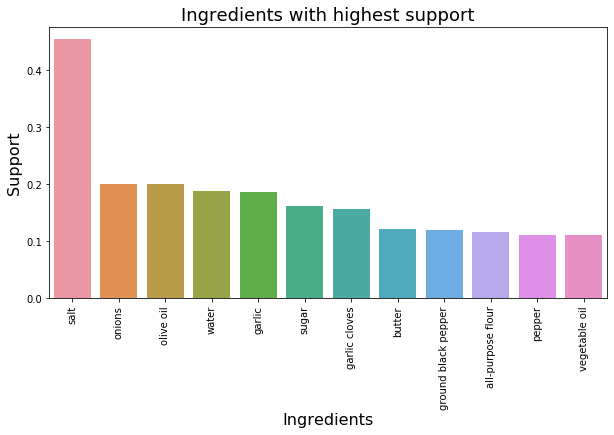

In [30]:
# ingredients with highest support
ingreds = list(df.ingredients.apply(lambda x: x.split(',')))
encoder = TransactionEncoder()
onehot = encoder.fit_transform(ingreds)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# extract frequent ingredient sets
frequent_itemsets1 = apriori(onehot, min_support = 0.1, max_len = 1, use_colnames=True)
frequent_itemsets1 = frequent_itemsets1.sort_values('support', ascending=False)
frequent_itemsets1.itemsets = frequent_itemsets1.itemsets.map(",".join)

plt.figure(figsize=(10,5)) 
sns.barplot(x='itemsets', y='support', data=frequent_itemsets1)
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Support', fontsize=16)
plt.title('Ingredients with highest support', fontsize=18)
plt.show()

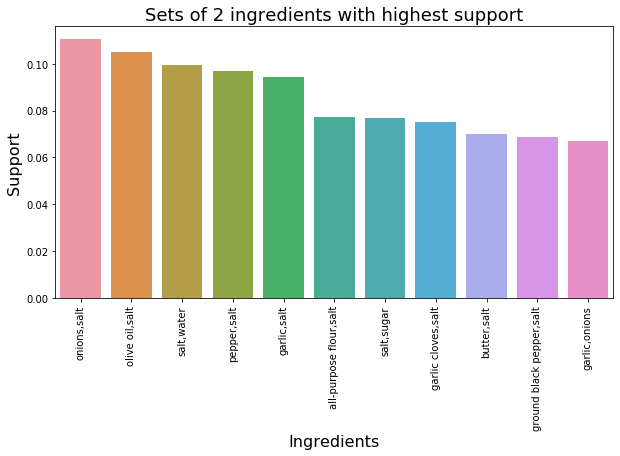

In [31]:
# 2 ingredients with highest support
ingreds = list(df.ingredients.apply(lambda x: x.split(',')))
encoder = TransactionEncoder()
onehot = encoder.fit_transform(ingreds)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# extract frequent ingredient sets
frequent_itemsets2 = apriori(onehot, min_support = 0.06, max_len = 2, use_colnames=True)
frequent_itemsets2 = frequent_itemsets2[frequent_itemsets2.itemsets.map(len) == 2].sort_values('support', ascending=False)
frequent_itemsets2.itemsets = frequent_itemsets2.itemsets.map(",".join)

plt.figure(figsize=(10,5)) 
sns.barplot(x='itemsets', y='support', data=frequent_itemsets2)
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Support', fontsize=16)
plt.title('Sets of 2 ingredients with highest support', fontsize=18)
plt.show()

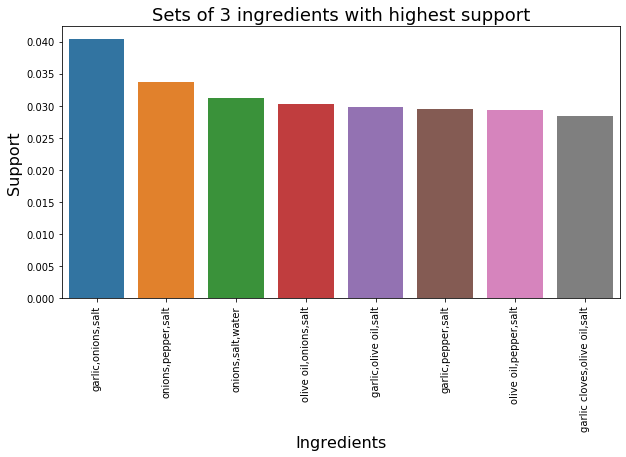

In [32]:
# 3 ingredients with highest support
ingreds = list(df.ingredients.apply(lambda x: x.split(',')))
encoder = TransactionEncoder()
onehot = encoder.fit_transform(ingreds)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# extract frequent ingredient sets
frequent_itemsets3 = apriori(onehot, min_support = 0.025, max_len = 3, use_colnames=True)
frequent_itemsets3 = frequent_itemsets3[frequent_itemsets3.itemsets.map(len) == 3].sort_values('support', ascending=False)
frequent_itemsets3.itemsets = frequent_itemsets3.itemsets.map(",".join)

plt.figure(figsize=(10,5)) 
sns.barplot(x='itemsets', y='support', data=frequent_itemsets3)
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Support', fontsize=16)
plt.title('Sets of 3 ingredients with highest support', fontsize=18)
plt.show()

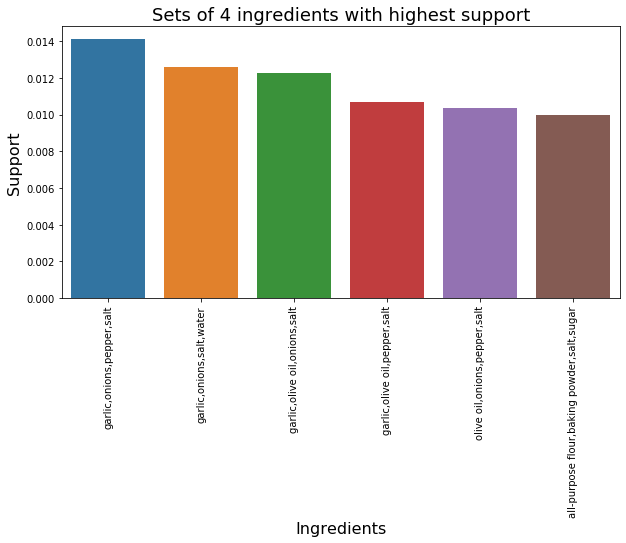

In [33]:
# 4 ingredients with highest support
ingreds = list(df.ingredients.apply(lambda x: x.split(',')))
encoder = TransactionEncoder()
onehot = encoder.fit_transform(ingreds)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# extract frequent ingredient sets
frequent_itemsets4 = apriori(onehot, min_support = 0.01, max_len = 4, use_colnames=True)
frequent_itemsets4 = frequent_itemsets4[frequent_itemsets4.itemsets.map(len) == 4].sort_values('support', ascending=False)
frequent_itemsets4.itemsets = frequent_itemsets4.itemsets.map(",".join)

plt.figure(figsize=(10,5)) 
sns.barplot(x='itemsets', y='support', data=frequent_itemsets4)
plt.xticks(rotation=90)
plt.xlabel('Ingredients', fontsize=16)
plt.ylabel('Support', fontsize=16)
plt.title('Sets of 4 ingredients with highest support', fontsize=18)
plt.show()

## Predict cuisine type

In [34]:
from sklearn.preprocessing import LabelEncoder

tf = TfidfVectorizer()
X = tfidf.fit_transform(df.ingredients)

enc = LabelEncoder()
y = enc.fit_transform(df.cuisine)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def model_eval(X, y, classifier, name):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    
    plt.figure(figsize=(20,12)) 
    sns.heatmap(cnf_matrix, annot=True, yticklabels=enc.classes_, xticklabels=enc.classes_)
    plt.title('Confusion matrix', fontsize=18)
    plt.ylabel('Actual label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    
    print(f'Accuracy of {name}: {round(metrics.accuracy_score(y_test, y_pred), 3)*100}%')
    print(f'Precision of {name}: {round(metrics.precision_score(y_test, y_pred, average="weighted"), 3)*100}%')
    print(f'Recall of {name}: {round(metrics.recall_score(y_test, y_pred, average="weighted"), 3)*100}%')
    print(f'F1 of {name}: {round(metrics.f1_score(y_test, y_pred, average="weighted"), 3)*100}%')

Accuracy of AdaBoost: 55.400000000000006%
Precision of AdaBoost: 56.3%
Recall of AdaBoost: 55.400000000000006%
F1 of AdaBoost: 52.2%


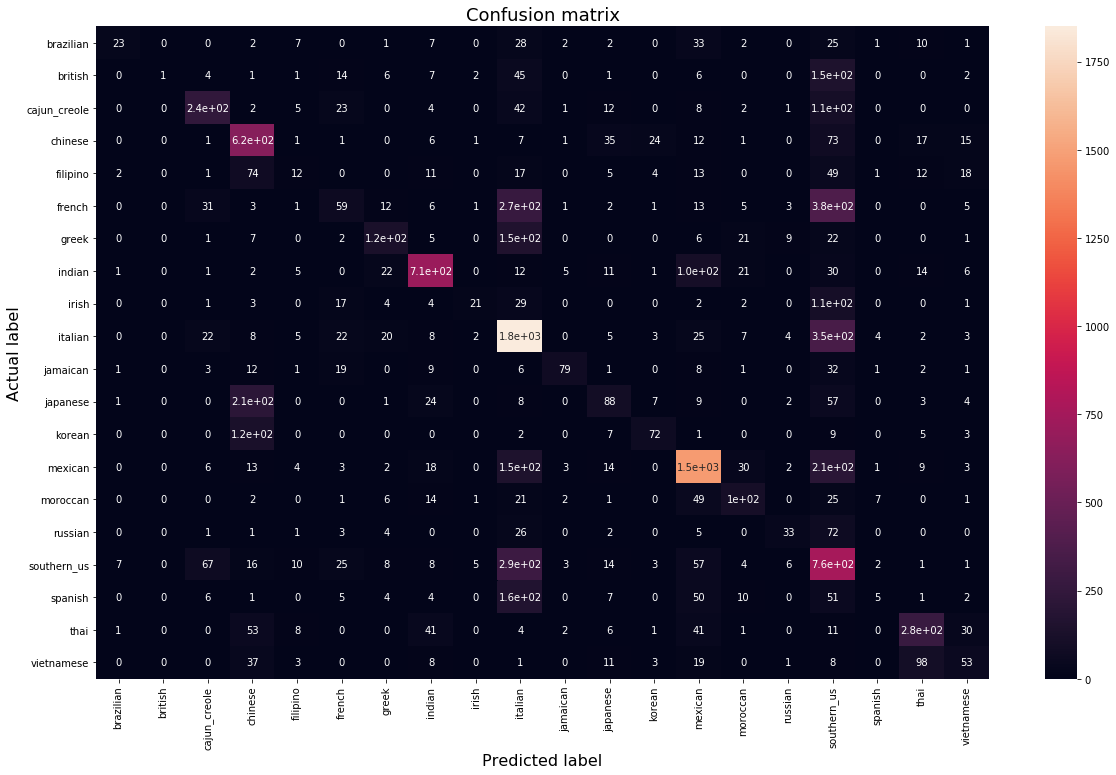

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_eval(X, y, ada, 'AdaBoost')

Accuracy of Decision Tree: 61.3%
Precision of Decision Tree: 60.8%
Recall of Decision Tree: 61.3%
F1 of Decision Tree: 61.0%


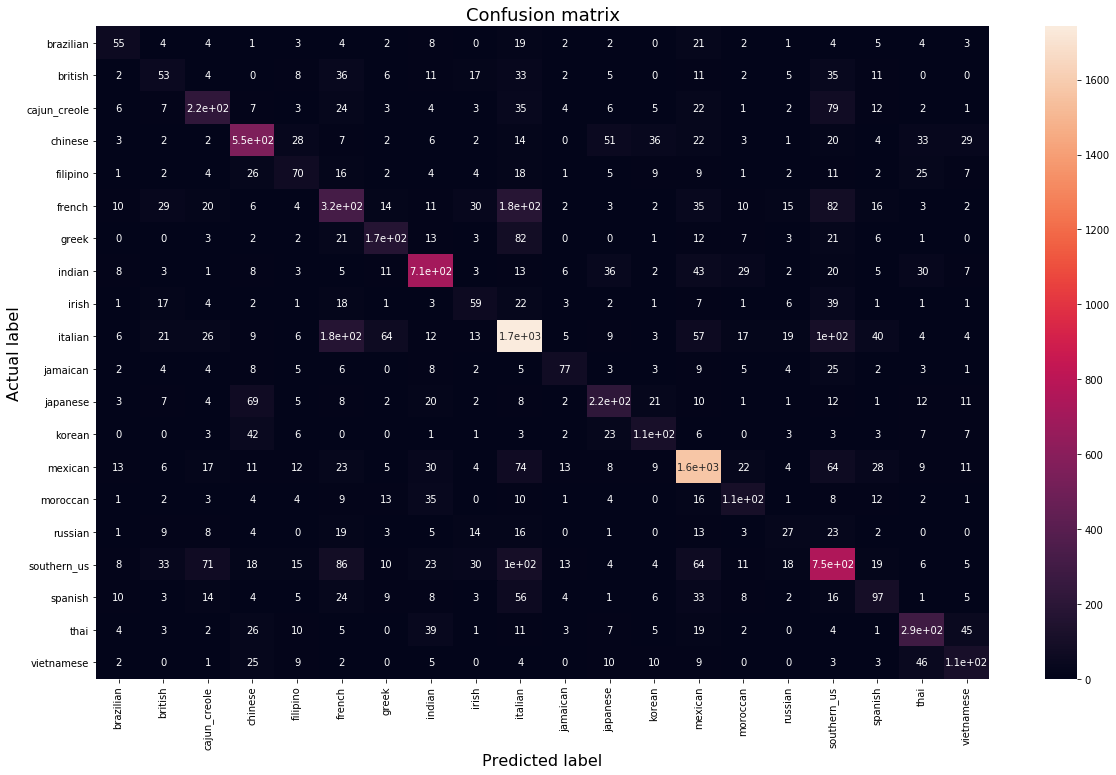

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_eval(X, y, dt, 'Decision Tree')

Accuracy of Knearest Neighbor: 73.3%
Precision of Knearest Neighbor: 73.5%
Recall of Knearest Neighbor: 73.3%
F1 of Knearest Neighbor: 72.89999999999999%


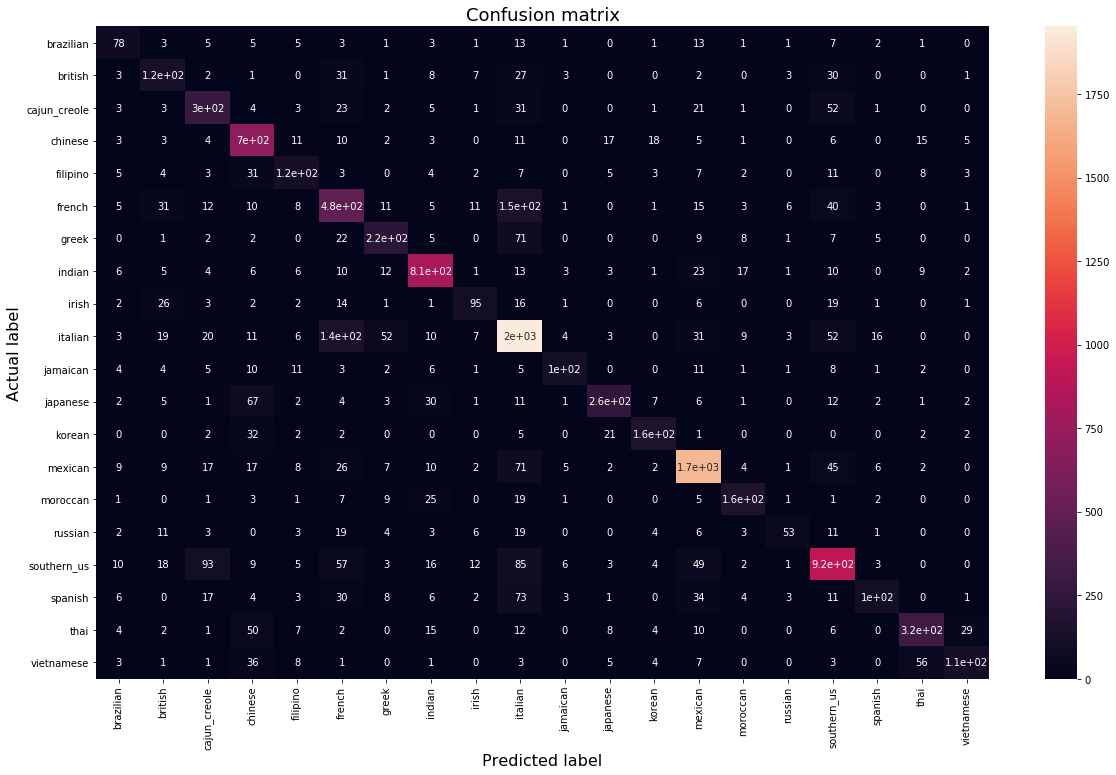

In [38]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
model_eval(X, y, kn, 'Knearest Neighbor')

Accuracy of Random Forest: 74.6%
Precision of Random Forest: 76.0%
Recall of Random Forest: 74.6%
F1 of Random Forest: 73.0%


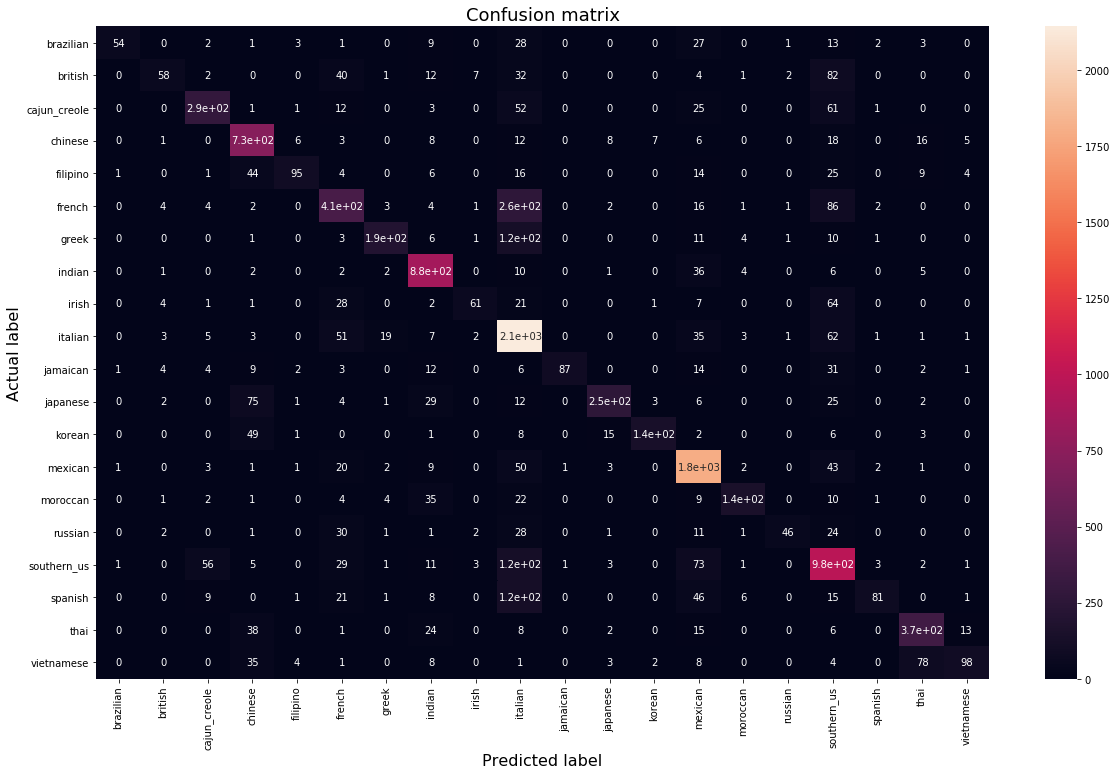

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_eval(X, y, rf, 'Random Forest')

/opt/anaconda3/envs/CommaSoft/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Logistic Regression: 78.3%
Precision of Logistic Regression: 78.3%
Recall of Logistic Regression: 78.3%
F1 of Logistic Regression: 77.7%


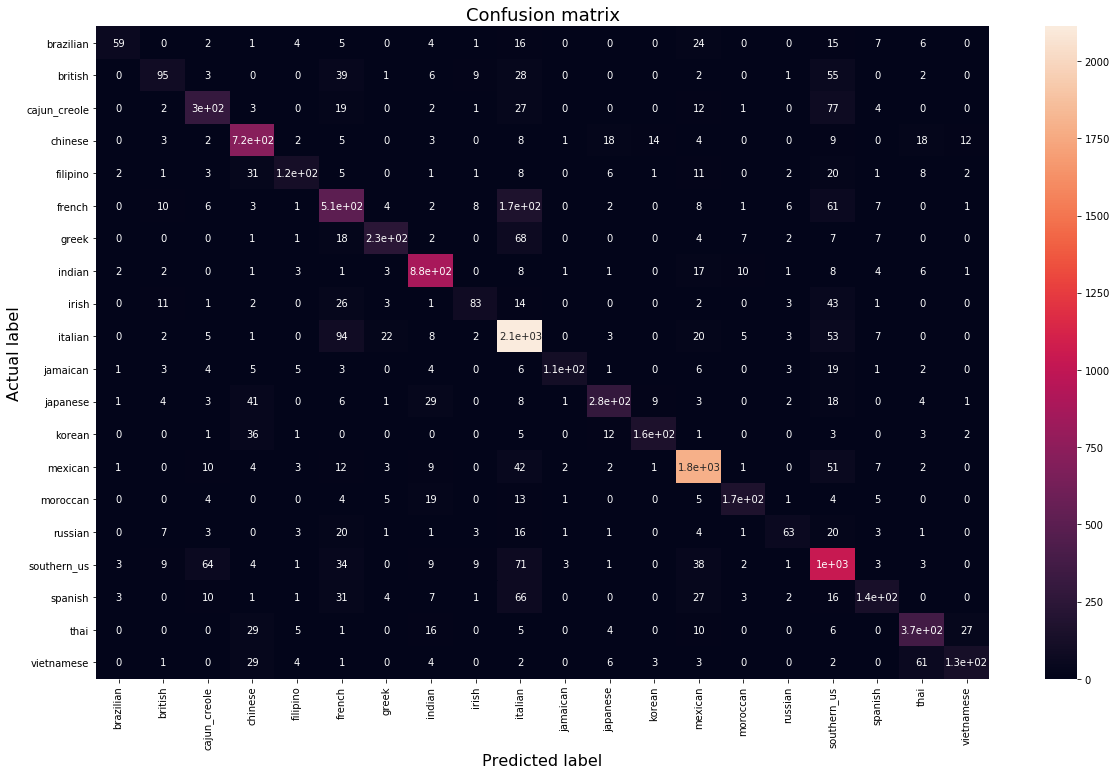

In [40]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
model_eval(X, y, logistic, 'Logistic Regression')